In [29]:
#! Import some useful packages
#! For plotting
import matplotlib.pyplot as plt
#! For symbolic utilities
import sympy as sp
#! import the FEniCS 
from dolfin import *

In [30]:
#! Construct an analytica solution
g = lambda x:  sp.exp(x)*pow(x,2)*sp.cos(x*5*sp.pi)

#! Define the sympy variable
x = sp.Symbol('x[0]')

# Convert lambda function to sympy
ue_code = sp.printing.ccode(g(x))

#! Use sympy to get forcing term
AE = 1.0 
f =  AE*sp.diff(g(x),x,2)
f_code = sp.printing.ccode(f)

In [31]:
#! Print the analytical solution
print( f )#! The sympy expression
print( f_code ) #! The sympy expression written in python code

1.0*(-10*pi*x[0]**2*sin(5*pi*x[0]) - 25*pi**2*x[0]**2*cos(5*pi*x[0]) + x[0]**2*cos(5*pi*x[0]) - 20*pi*x[0]*sin(5*pi*x[0]) + 4*x[0]*cos(5*pi*x[0]) + 2*cos(5*pi*x[0]))*exp(x[0])
1.0*(-10*M_PI*pow(x[0], 2)*sin(5*M_PI*x[0]) - 25*pow(M_PI, 2)*pow(x[0], 2)*cos(5*M_PI*x[0]) + pow(x[0], 2)*cos(5*M_PI*x[0]) - 20*M_PI*x[0]*sin(5*M_PI*x[0]) + 4*x[0]*cos(5*M_PI*x[0]) + 2*cos(5*M_PI*x[0]))*exp(x[0])


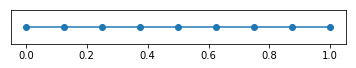

In [32]:
#! Create the mesh
ndiv = 3
mesh = UnitIntervalMesh(pow(2,ndiv))
plot(mesh) ;

In [33]:
#! Creat finite element space
poly_order = 1
V = FunctionSpace(mesh,"Lagrange",poly_order)

#! Create trial and test function
u = TrialFunction(V)
v = TestFunction(V)
uh = Function(V)

In [34]:
#! The Bilinear form
a = AE*inner( grad(u), grad(v) )*dx

In [35]:
#! The source term 
f = Expression(f_code, degree=4)
F = -1*inner(f,v )*dx

In [36]:
#! Boundaries 
def boundary(x, on_boundary): 
    return on_boundary

#! Boundary conditions 
ue = Expression(ue_code,degree=4)
bc_dirichlet = DirichletBC(V, ue, boundary )

In [37]:
#! Solve the problem
solve( a == F, uh, bc_dirichlet)

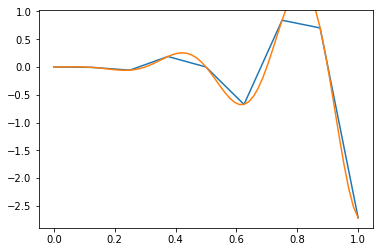

In [40]:
#! Plot the computed solution
plot(uh, wireframe = True) ;

#! Plot the interpolated exact solution
#! Construct a much finer mesh
mesh_fine = UnitIntervalMesh(pow(2,6))
V_fine = FunctionSpace(mesh_fine,"Lagrange",poly_order)

# Interpolate the analytical solution on the finer mesh
ue_h = interpolate( ue, V_fine) 

#! Plot the analytical solution
plot(ue_h)  ; 
